In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("epi_r.csv")

In [4]:
df.shape

(20052, 680)

In [5]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = df[["title", "calories", "protein","fat", "sodium", "dessert"]]

# Exploratory Data Analysis

In [7]:
df.isna().any()

title       False
calories     True
protein      True
fat          True
sodium       True
dessert     False
dtype: bool

In [8]:
df.nunique()

title       17736
calories     1858
protein       282
fat           326
sodium       2434
dessert         2
dtype: int64

In [9]:
df_no_duplicity = df.drop_duplicates()

In [10]:
df_no_duplicity.isnull().sum()

title          0
calories    3732
protein     3760
fat         3780
sodium      3733
dessert        0
dtype: int64

In [11]:
df_no_duplicity = df_no_duplicity.dropna()
df_no_duplicity.shape

(14403, 6)

In [12]:
df_no_duplicity.describe()

,calories,protein,fat,sodium,dessert
count,1.440300e+04,14403.000000,1.440300e+04,1.440300e+04,14403.000000
mean,6.666392e+03,92.641741,3.645512e+02,6.617940e+03,0.185239
std,3.760675e+05,3519.910073,2.139252e+04,3.496002e+05,0.388505
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.070000e+02,3.000000,8.000000e+00,9.100000e+01,0.000000
50%,3.480000e+02,9.000000,1.800000e+01,3.070000e+02,0.000000
75%,6.010000e+02,28.500000,3.400000e+01,7.365000e+02,0.000000
max,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000


In [13]:
# Lets check 95 percentile value of "calories"
df_no_duplicity.calories.quantile(0.95)

1326.699999999999

In [14]:
# considering only that reciepe where calories is less than 95th percentile calorie count

df_no_duplicity = df_no_duplicity[(df_no_duplicity["calories"] < df_no_duplicity.calories.quantile(0.95)) & 
                                  (df_no_duplicity["calories"] >0)]

In [15]:
df_no_duplicity.calories.describe()

count    13677.000000
mean       403.768224
std        274.169306
min          1.000000
25%        201.000000
50%        329.000000
75%        551.000000
max       1324.000000
Name: calories, dtype: float64

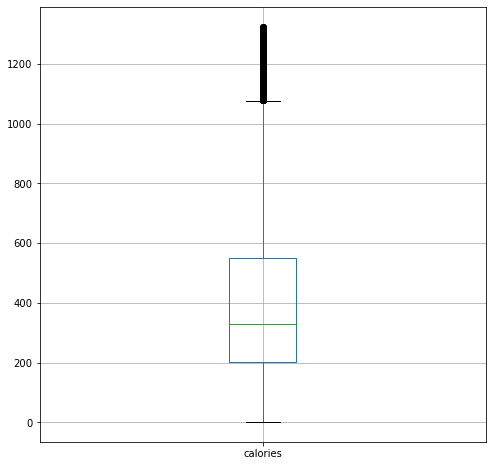

In [16]:
df_no_duplicity.boxplot(column="calories", return_type='axes', figsize=(8,8))

In [17]:
def remove_outlier_IQR(df1,df_column):
    Q1=df1[df_column].quantile(0.25)
    Q3=df1[df_column].quantile(0.75)
    IQR=Q3-Q1
    vysledek=df1[~((df1[df_column] < (Q1 - 1.5 * IQR)) |(df1[df_column] > (Q3 + 1.5 * IQR)))]
    return vysledek

In [18]:
df_final = remove_outlier_IQR(df_no_duplicity,"calories")
df_final = remove_outlier_IQR(df_final,"sodium")

In [19]:
df_final.describe()

,calories,protein,fat,sodium,dessert
count,12472.000000,12472.000000,12472.000000,12472.000000,12472.000000
mean,366.746312,14.080180,19.927117,361.180484,0.201732
std,231.569796,16.822182,17.087986,360.685694,0.401309
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,194.000000,3.000000,7.000000,70.000000,0.000000
50%,309.000000,7.000000,16.000000,239.000000,0.000000
75%,504.000000,20.000000,28.000000,550.000000,0.000000
max,1076.000000,155.000000,108.000000,1500.000000,1.000000


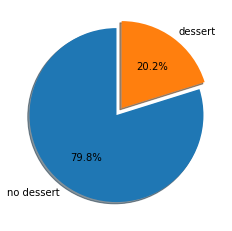

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(df_final.groupby("dessert").count()["title"], explode=(0, 0.1), labels=('no dessert', 'dessert'), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [21]:
#Normalising the data

df_norm_values = df_final.copy()
cols_to_norm = ['calories','protein','fat', 'sodium']
df_norm_values[cols_to_norm] = df_norm_values[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Logistic Regerresion

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix
X = df_norm_values[['calories','protein','fat', 'sodium']]
y = df_norm_values.dessert
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=1)

In [23]:
reg = LogisticRegression()
reg.fit(xtrain, ytrain)

y_pred_lr = reg.predict(xtest)
log_train = round(reg.score(xtrain, ytrain) * 100, 2)
log_accuracy_MinMax = round(accuracy_score(y_pred_lr, ytest) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy_MinMax ,"%")

Training Accuracy    : 82.71 %
Model Accuracy Score : 82.33 %


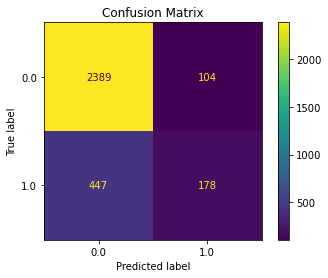

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
plot_confusion_matrix(reg, xtest, ytest);
plt.title('Confusion Matrix');

In [25]:
df_final["prot_on_100cal"] = round(df_final["protein"]/(df_final["calories"]/100),2)
df_final.head()

,title,calories,protein,fat,sodium,dessert,prot_on_100cal
0,"Lentil, Apple, and Turkey Wrap",426.0,30.0,7.0,559.0,0.0,7.04
1,Boudin Blanc Terrine with Red Onion Confit,403.0,18.0,23.0,1439.0,0.0,4.47
2,Potato and Fennel Soup Hodge,165.0,6.0,7.0,165.0,0.0,3.64
4,Spinach Noodle Casserole,547.0,20.0,32.0,452.0,0.0,3.66
5,The Best Blts,948.0,19.0,79.0,1042.0,0.0,2.00


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


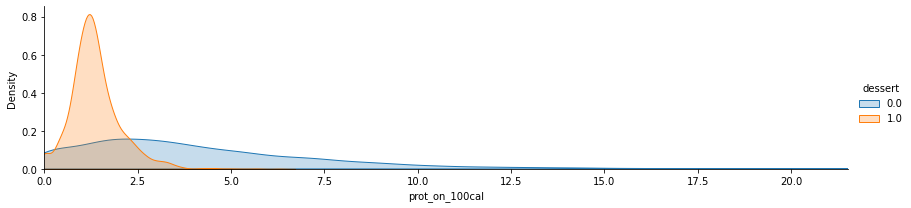

In [27]:
import seaborn as sns

a = sns.FacetGrid(df_final, hue = "dessert", aspect=4 )
a.map(sns.kdeplot, "prot_on_100cal", shade= True )
a.set(xlim=(0, df_final["prot_on_100cal"].max()))
a.add_legend()

# K neighbour Classifier

In [28]:
X = df_final[["prot_on_100cal"]]
y = df_final.dessert

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=1)

Training Accuracy    : 82.26 %
Model Accuracy Score : 81.01 %


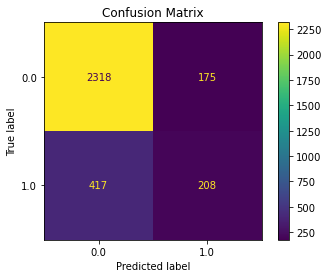

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(xtrain, ytrain)
y_pred_knn = knn.predict(xtest)

knn_train = round(knn.score(xtrain, ytrain) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, ytest) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
plot_confusion_matrix(knn, xtest, ytest);
plt.title('Confusion Matrix');